In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

In [ ]:
Q1.

Geometrically, the condition that the nut will fit into both the blocks is given by:

Case 1:
When r > $\vert$ r_p - r_b $\vert$, the maximum diameter of circle that can come inside is given by the minimum of horizontal length and vertical length joining the intersection of the two circles. This is given by the following:

Vertically, maximum diameter = 

\begin{equation}
    vert = \frac{\sqrt{(r_b + r_p + r)(r_b + r_p - r)(-r_b + r_p + r)(r_b - r_p + r)}}{2r}
\end{equation}

and horizontally, the maximum distance will be given by 
\begin{equation}
    horr = \frac{\sqrt{(r_b^2 - vert^2)} + \sqrt{(r_p^2 - vert^2)}}{2}
\end{equation}

Case 2: 
When r < $\vert$ r_p - r_b $\vert$, the maximum radius of the circle that can come inside is given by the minimum of the two circles, since this condition means that the smaller circle lies completely within the bigger circle.

Case 3: 
When $r > r_b + r_a$, this means that the circles don't have any common area within them, which means that there is zero probability of the nut going in the area. 

In [ ]:
import numpy as np
import scipy as sp
N = 1000000;
rb = np.random.normal(25.25,0.05/3,N);
rp = np.random.normal(25.15,0.05/3,N);
br = np.random.normal(24.95,0.21/3,N);
xtop = np.random.normal(100,0.2/3,N);
ytop = np.random.normal(100,0.2/3,N);
xbot = np.random.normal(100,0.2/3,N);
ybot = np.random.normal(100,0.2/3,N);

#rb = 25.25*sp.ones(N);
#rp = 25.15*sp.ones(N);
#br = 24.95*sp.ones(N);
#xtop = 100*sp.ones(N);
#ytop = 100*sp.ones(N);
#xbot = 100*sp.ones(N);
#ybot = 100*sp.ones(N);
count1 = 0;
count = 0;
for i in range(0,N):
    r = ((xbot[i]-xtop[i])**2 + (ybot[i] - ytop[i])**2)**0.5;
    #print(r);
    #print(abs(rb[i] - rp[i]));
    if abs(rb[i]-rp[i]) < r:
        temp1 = ((rb[i] + rp[i] + r)*(rb[i] + rp[i] -r)*(rb[i] - rp[i] + r)*(-rb[i] + rp[i] + r))/(4*r*r);
        #temp = min((rb[i] + rp[i] - (rb[i]**2 + rp[i]**2)**0.5)/2,rp[i]*rb[i]/(rp[i]**2 + rb[i]**2)**0.5);
        temp2 = (rb[i]**2 - temp1)**0.5;
        temp3 = (rp[i]**2 - temp1)**0.5;
        #print(temp1);
        temp4 = rb[i] + rp[i] - temp2 - temp3;
        horr = temp4/2;
        vert = temp1**0.5;
        #print(temp);
        if br[i] > max(vert,horr):
            count = count + 1;
    if abs(rb[i]-rp[i]) > r:
        if br[i] > min(rb[i],rp[i]):
            count = count + 1;

prob = count/N;
print("Misfit probability : ");
print(prob);

Yes, the probability in fact seems low, as it means physically that not even half of the nuts will go inside. To make sure that more nuts go inside, the most viable way would be to decrease the radius of the nuts or increase the size of the holes. This is the only way it can be achieved by not increasing the costs of making the system dramatically.

In [ ]:
Q2.

In [ ]:
#Mathematical-1
import scipy as sp
import numpy as np
P = sp.zeros((4,4));
p = 1/3;
N_steps = 100000;
P = [[1-p,p,0,0],[p,1-2*p,p,0],[0,p,1-2*p,p],[0,0,p,1-p]];
#print(P);
Rtemp = np.eye(4);
for i in range(1,N_steps):
    R = np.matmul(Rtemp,P);
    Rtemp = R;
print(R);

In [ ]:
#Mathematical_Simulation
import scipy as sp
import random
import numpy as np
P = np.zeros((4,4));
i = 1;
p = 1/3;
N = 100000;
count1 = 0;
count2 = 0;
count3 = 0;
count4 = 0;
p1 = 0;
p2 = 0;
p3 = 0;
p4 = 0;
for j in range(1,N):
    x = random.uniform(0,1);
    if i == 1:
        if x<1-p:
            i = 1;
            count1 = count1 + 1;
        else:
            i = 2;
            count2 = count2 + 1;
    elif i==2:
        if x<p:
            i = 1;
            count1 = count1 + 1;
        elif x>p and x<(1-p):
            i = 2;
            count2 = count2 + 1;
        else:
            i = 3;
            count3 = count3 + 1;
    elif i == 3:
        if x<p:
            i = 2;
            count2 = count2 + 1;
        elif x>p and x<(1-p):
            i = 3;
            count3 = count3 + 1;
        else:
            i = 4;
            count4 = count4 + 1;
    elif i == 4:
        if x<p:
            i = 3;
            count3 = count3 + 1;
        else:
            i = 4;
            count4 = count4 + 1;

p1 = count1/N;
p2 = count2/N;
p3 = count3/N;
p4 = count4/N;
print(p1);
print(p2);
print(p3);
print(p4);

This can also be shown by solving the equations.

If $\pi_0, \pi_1, \pi_2$ and $\pi_3$ are the probabilities of achieving state 1, 2, 3 and 4 respectively in steady state, we can write the equations as:

\begin{equation}
    (1-p)\pi_0 + p \pi_1 = \pi_0
\end{equation}

\begin{equation}
    p\pi_0 + (1-2p) \pi_1 + p \pi_2 = \pi_1
\end{equation}

\begin{equation}
    p\pi_1 + (1-2p) \pi_2 + p \pi_3 = \pi_2
\end{equation}

\begin{equation}
    \pi_0 + \pi_1 + \pi_2 + \pi_3 = 1
\end{equation}

which can be written as:

\begin{equation}
    \frac{1}{3}\pi_0 - \frac{1}{3}\pi_1 = 0
\end{equation}

\begin{equation}
    \frac{1}{3}\pi_0 - \frac{2}{3}\pi_1 + \frac{1}{3}\pi_2 = 0
\end{equation}

\begin{equation}
    \frac{1}{3}\pi_2 - \frac{1}{3}\pi_3 = 0
\end{equation}

\begin{equation}
    \pi_0 + \pi_1 + \pi_2 + \pi_3 = 1
\end{equation}

which gives

\begin{equation}
    \pi_0 = \pi_1 = \pi_2 = \pi_3 = \frac{1}{4}
\end{equation}

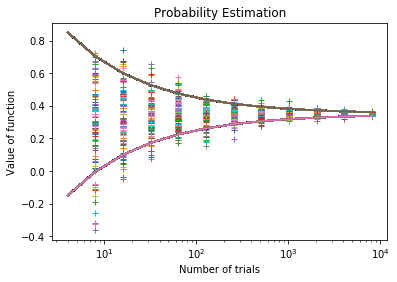

In [6]:
#Part a
import scipy as sp
import random
import numpy as np
def my_func(t):
    f = sp.cos(2*sp.pi*(1-t**2)**0.5);
    return f;

power = sp.arange(2,14);
Num = 2**power;
val = 0;
sum = 0;
N_sim = 100;
prob = sp.zeros((len(Num),N_sim));
for k in range(1,len(Num)):
    N = Num[k];
    for j in range(1,N_sim):
        sum = 0;
        for i in range(1,N):
            x = random.uniform(0,1);
            val = my_func(x);
            sum = sum + val;
        p = sum/N;
        prob[k,j] = p;

import matplotlib.pyplot as plt
for i in range(1,len(Num)):
    for j in range(1,N_sim):
        plt.semilogx(Num[i],prob[i,j],'+');
        plt.semilogx(Num,0.35 + (1/Num)**0.5);
        plt.semilogx(Num,0.35 - (1/Num)**0.5);

        
plt.xlabel('Number of trials');
plt.ylabel('Value of function');
plt.title('Probability Estimation');
plt.show();

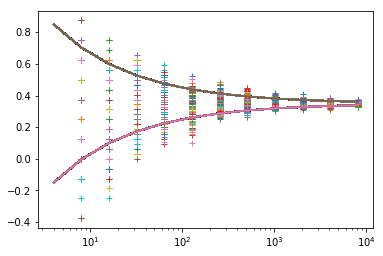

In [7]:
#Part B
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
def computepi(Num,N_sim):
    count = 0;
    prob = np.zeros((len(Num),N_sim));
    for k in range(1,len(Num)):
        N = Num[k];
        X = np.zeros(N);
        Y = np.zeros(N);
        f = np.zeros(N);
        for j in range(1,N_sim):
            count = 0;
            for i in range(N):
                X[i] = random.uniform(0,1);
            for i in range(N):
                Y[i] = random.uniform(0,1);
            f = sp.cos(2*sp.pi*((1-X**2)**0.5));
            for i in range(1,N):
                if f[i] > 0:
                    if f[i] > Y[i]:
                        count = count + 1;
                if f[i] < 0:
                    if abs(f[i]) > Y[i]:
                        count = count - 1;
            prob[k,j] = count/N;

    for i in range(1,len(Num)):
        for j in range(1,N_sim):
            plt.semilogx(Num[i],prob[i,j],'+');
            plt.semilogx(Num,0.35 + (1/Num)**0.5);
            plt.semilogx(Num,0.35 - (1/Num)**0.5);
    plt.xlabel('Number of trials');
    plt.ylabel('Value of function');
    plt.title('Probability Estimation');
    plt.show();

power = sp.arange(2,14);
Num = 2**power;
N_sim = 200;
computepi(Num,N_sim)